<a href="https://colab.research.google.com/github/idowujames/KPMG-Virtual-Data-Analytics-Internship/blob/main/KPMG_Virtual_Data_Analytics_Internship_(2)_Exploration_%26_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Data Exploration of existing Customer transactions

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation.

The marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

In [23]:
# Func for reading in the datasets and skipping the first row

def read_data(data_path):
  return (pd.read_csv(data_path,skiprows=1))

In [24]:
# Reading in the datasets
transaction = read_data('https://raw.githubusercontent.com/idowujames/KPMG-Virtual-Data-Analytics-Internship/main/KPMG%20-%20Transactions.csv')
cust_address = read_data('https://raw.githubusercontent.com/idowujames/KPMG-Virtual-Data-Analytics-Internship/main/KPMG%20-%20CustomerAddress.csv')
cust_demographic = read_data('https://raw.githubusercontent.com/idowujames/KPMG-Virtual-Data-Analytics-Internship/main/KPMG%20-%20CustomerDemographic.csv')
cust_new = read_data('https://raw.githubusercontent.com/idowujames/KPMG-Virtual-Data-Analytics-Internship/main/KPMG%20-%20NewCustomerList.csv')

## Exploration of Existing Customer & Their Transactions
Exploration and feature engineering of Existing Customer & their transactions to find insights to help see how to better target the new customers.

### Cleaning and feature engineering of the transaction dataset

---



---



In [27]:
print(transaction.info())
transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB
None


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [31]:
# Viewing the percentage of missing values in transaction dataset
(transaction.isna().sum())/len(transaction) * 100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [33]:
# Dropping null values since they are quite small

transaction = transaction.dropna()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.1+ MB


#### Converting `transaction_date` and `product_first_sold_date` to date time

In [34]:
# Converting the DOB column to date
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'])

In [37]:
# Converting the product_first_sold_date column to date using the standard excel way of storing dates in int value
transaction['product_first_sold_date'] = pd.to_timedelta(transaction.product_first_sold_date, unit='D') + pd.to_datetime('1899-12-30')

In [39]:
transaction.info()
transaction.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  object        
 12  product_first_sold_date  19445 n

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
6838,6839,10,1376,2017-01-06,False,Approved,WeareA2B,Touring,medium,medium,1466.68,$363.25,2003-08-05
6996,6997,0,2476,2017-04-22,False,Approved,OHM Cycles,Road,high,large,12.01,$7.21,2009-03-08
3857,3858,1,403,2017-03-28,True,Approved,Giant Bicycles,Standard,medium,medium,1403.50,$954.82,2016-11-14
4386,4387,67,205,2017-05-05,True,Approved,Norco Bicycles,Road,medium,medium,544.05,$376.84,2000-05-22
1620,1621,14,1302,2017-05-15,False,Approved,Trek Bicycles,Standard,medium,small,1386.84,"$1,234.29",2010-05-05


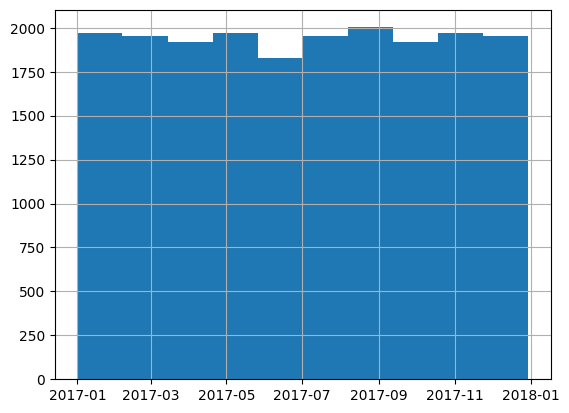

In [47]:
# checking the transaction date graph for unsual dates
transaction['transaction_date'].hist()
plt.show()

## Feature Engineering

### Getting the age and age brackets of the new customers

In [15]:
# Converting the DOB column to date
cust_new['DOB'] = pd.to_datetime(cust_new['DOB'])

In [22]:
# Getting the ages of customers as of 2018(Time the dataset was given)
cust_new['age'] = (datetime(2018, 1, 1) - cust_new['DOB']).astype('<m8[Y]')

In [19]:
# Getting their age groups
bins = [0, 18, 35, 60, 100]
labels = ['child', 'young adult', 'middle aged', 'senior']
cust_new['age_group'] = pd.cut(cust_new['age'], bins=bins, labels=labels)


In [21]:
df.sample(8)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
384,Palmer,Heaven,Male,82,1995-05-18,Staff Scientist,Financial Services,Affluent Customer,N,Yes,9,5 Hoard Parkway,3754,VIC,Australia,6.0,382,0.950000,22.0,young adult
468,Norah,Mapis,Female,75,2000-12-09,Assistant Manager,Argiculture,Mass Customer,N,No,10,057 Victoria Crossing,2263,NSW,Australia,9.0,468,0.889844,17.0,child
175,Tanya,Kiefer,Female,54,1992-07-05,Speech Pathologist,Telecommunications,High Net Worth,N,No,7,4 Warner Park,2146,NSW,Australia,9.0,174,1.168750,25.0,young adult
417,Freddi,Litherborough,Female,46,1989-01-14,Product Engineer,Financial Services,Mass Customer,N,No,7,7873 Meadow Vale Plaza,2460,NSW,Australia,3.0,418,0.918000,28.0,young adult
268,Raff,Waycott,Male,70,1951-12-16,Engineer IV,Manufacturing,Affluent Customer,N,Yes,14,94694 Eagle Crest Terrace,3977,VIC,Australia,7.0,259,1.062500,66.0,senior
556,Worthington,Ahmed,Male,79,1972-03-24,Senior Cost Accountant,Financial Services,High Net Worth,N,No,13,39408 Manufacturers Road,3335,VIC,Australia,3.0,555,0.812500,45.0,middle aged
126,Rebeca,Aggas,Female,66,1953-02-27,Social Worker,Health,Affluent Customer,N,No,21,7026 Katie Lane,3818,VIC,Australia,1.0,127,1.250000,64.0,senior
581,Debbie,Tillman,Female,3,1990-07-06,Account Coordinator,Manufacturing,High Net Worth,N,Yes,13,527 Jay Trail,4551,QLD,Australia,8.0,582,0.790000,27.0,young adult
